# 01 — Data Exploration

Exploratory data analysis of London Airbnb listings:
- Dataset overview and structure
- Missing values analysis
- Price distribution (raw and log-transformed)
- Geographic and neighbourhood analysis
- Correlation matrix of key numeric features

In [6]:
import sys
sys.path.insert(0, '..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import load_listings, load_reviews
from src.data_cleaning import clean_prices, convert_date_columns
from src.visualization import (
    set_style,
    plot_price_distribution,
    plot_neighbourhood_analysis,
    plot_correlation_matrix,
    plot_boxplot_by_neighbourhood
)

set_style()

## 1. Load Raw Data

In [7]:
listings_raw = load_listings(city='London')
reviews_raw = load_reviews(city='London')

print(f'Listings: {listings_raw.shape[0]:,} rows × {listings_raw.shape[1]} columns')
print(f'Reviews:  {reviews_raw.shape[0]:,} rows × {reviews_raw.shape[1]} columns')

Listings: 75,241 rows × 75 columns
Reviews:  1,352,432 rows × 6 columns


## 2. Dataset Overview

In [8]:
listings_raw.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,714569379355913481,https://www.airbnb.com/rooms/714569379355913481,20230314070633,2023-03-14,city scrape,Lovely private bedroom in Muswell Hill.,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,39009854,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,808038970516277767,https://www.airbnb.com/rooms/808038970516277767,20230314070633,2023-03-14,city scrape,Studio Flat Franklin London,Brand New Modern Kitchen<br />Close to Excelle...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495977998,...,NaN,NaN,NaN,NaN,t,7,7,0,0,NaN
2,822557738577472503,https://www.airbnb.com/rooms/822557738577472503,20230314070633,2023-03-14,city scrape,PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi,Enjoy easy access to everything from this perf...,NaN,https://a0.muscache.com/pictures/d77957d5-695a...,325629338,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
3,3518856,https://www.airbnb.com/rooms/3518856,20230314070633,2023-03-14,city scrape,Wimbledon Double Bedroom Ensuite,A welcoming and stylish 2 bedroom 2 bathroom f...,NaN,https://a0.muscache.com/pictures/23a18442-fc1d...,187811,...,5.0,3.67,3.67,NaN,f,2,0,2,0,0.05
4,4876550,https://www.airbnb.com/rooms/4876550,20230314070633,2023-03-14,city scrape,Stunning Apartment 2 minutes walk to Tube Station,Luxury Modern Apartment in modern development ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25087384,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [9]:
listings_raw.dtypes

id                                                int64
listing_url                                         str
scrape_id                                         int64
last_scraped                                        str
source                                              str
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [10]:
listings_raw.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.524100e+04,7.524100e+04,7.524100e+04,75236.000000,75236.000000,0.0,75241.000000,75241.000000,75241.000000,0.0,...,55564.000000,55592.000000,55565.000000,55562.000000,0.0,75241.000000,75241.000000,75241.000000,75241.000000,56548.000000
mean,2.368628e+17,2.023031e+13,1.390765e+08,39.525958,71.379100,NaN,51.509708,-0.128108,3.105793,NaN,...,4.783393,4.801027,4.729358,4.607755,NaN,15.756689,11.993248,3.611581,0.022342,0.877064
std,3.425911e+17,0.000000e+00,1.529621e+08,222.170789,420.039233,NaN,0.048369,0.099341,1.936972,NaN,...,0.453835,0.448759,0.418873,0.521839,NaN,55.537579,41.566819,21.097764,0.293638,1.234003
min,1.391300e+04,2.023031e+13,2.594000e+03,1.000000,1.000000,NaN,51.295937,-0.497800,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.981740e+07,2.023031e+13,1.995923e+07,1.000000,1.000000,NaN,51.483540,-0.189390,2.000000,NaN,...,4.750000,4.790000,4.640000,4.500000,NaN,1.000000,0.000000,0.000000,0.000000,0.130000
50%,3.933875e+07,2.023031e+13,6.745519e+07,2.000000,2.000000,NaN,51.513840,-0.126280,2.000000,NaN,...,4.940000,4.970000,4.850000,4.750000,NaN,1.000000,1.000000,0.000000,0.000000,0.450000
75%,6.562985e+17,2.023031e+13,2.248670e+08,5.000000,8.000000,NaN,51.539450,-0.068460,4.000000,NaN,...,5.000000,5.000000,5.000000,4.970000,NaN,5.000000,2.000000,1.000000,0.000000,1.090000
max,8.463271e+17,2.023031e+13,5.050400e+08,2138.000000,24047.000000,NaN,51.681142,0.288570,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,501.000000,288.000000,241.000000,11.000000,51.050000


## 3. Missing Values Analysis

In [11]:
# Percentage of missing values per column (top 20)
missing = (
    listings_raw.isnull().sum()
    .sort_values(ascending=False)
    / len(listings_raw)
    * 100
)
missing[missing > 0].head(20).round(2)

license                         100.00
neighbourhood_group_cleansed    100.00
bathrooms                       100.00
calendar_updated                100.00
host_about                       47.40
neighborhood_overview            44.50
neighbourhood                    44.50
host_neighbourhood               41.33
host_response_rate               38.48
host_response_time               38.48
host_acceptance_rate             32.18
review_scores_value              26.15
review_scores_checkin            26.15
review_scores_location           26.15
review_scores_communication      26.11
review_scores_accuracy           26.11
review_scores_cleanliness        26.10
last_review                      24.84
first_review                     24.84
reviews_per_month                24.84
dtype: float64

## 4. Price Distribution

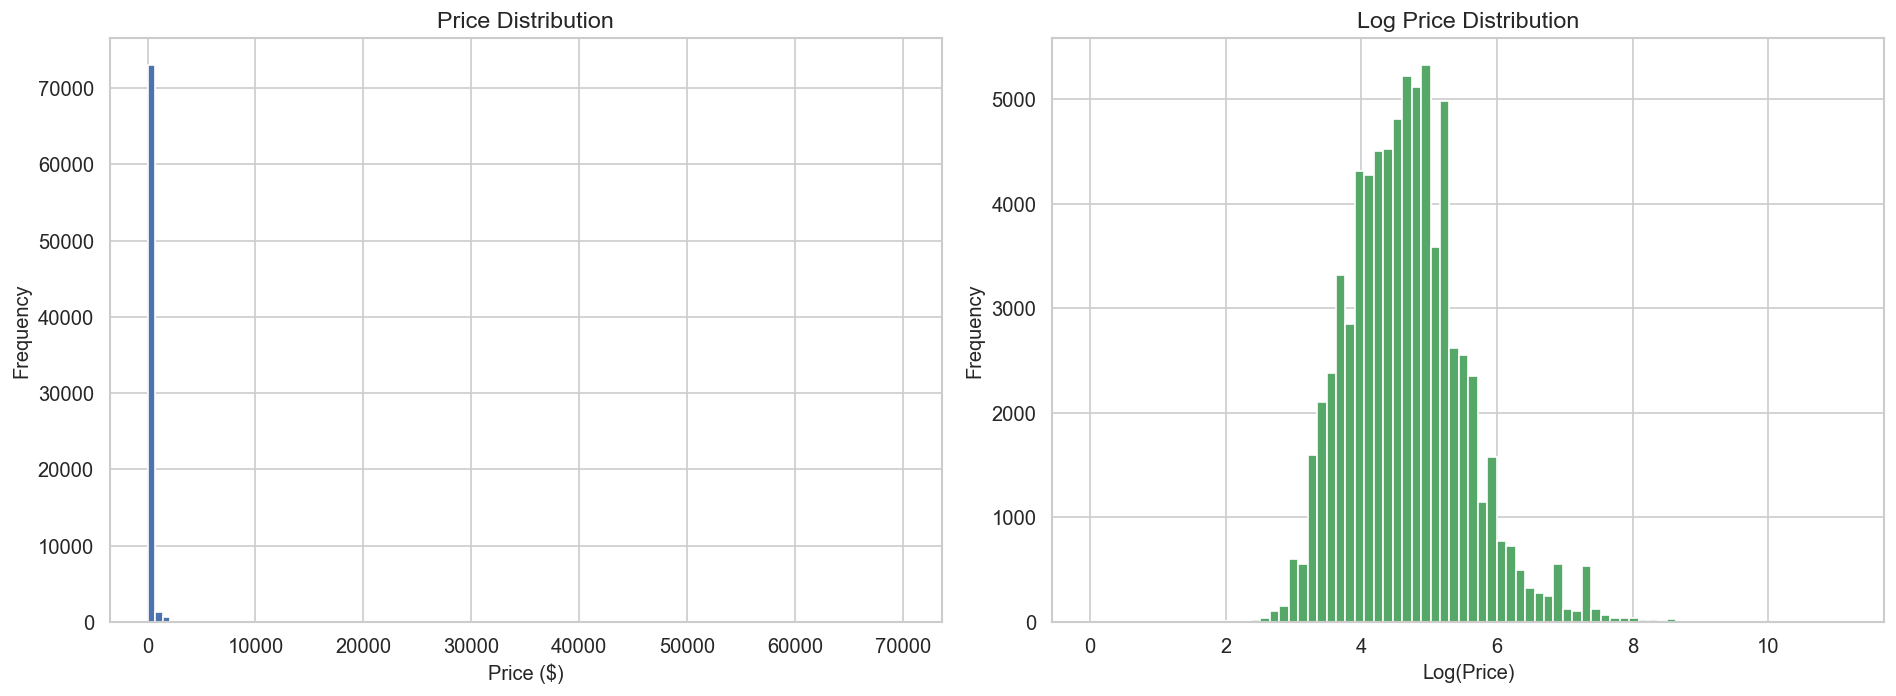

In [12]:
# Clean prices for visualization
listings_viz = clean_prices(listings_raw.copy())
listings_viz = listings_viz[listings_viz['price'] > 0]
listings_viz['log_price'] = np.log(listings_viz['price'])

plot_price_distribution(listings_viz)

## 5. Room Type & Property Type Analysis

In [13]:
print('Room Types:')
print(listings_raw['room_type'].value_counts())
print(f'\nNumber of unique property types: {listings_raw["property_type"].nunique()}')
print('\nTop 15 Property Types:')
print(listings_raw['property_type'].value_counts().head(15))

Room Types:
room_type
Entire home/apt    45714
Private room       28910
Shared room          403
Hotel room           214
Name: count, dtype: int64

Number of unique property types: 101

Top 15 Property Types:
property_type
Entire rental unit                   26457
Private room in rental unit          12626
Private room in home                  9014
Entire condo                          8843
Entire home                           6068
Private room in condo                 3129
Entire serviced apartment             1886
Private room in townhouse             1406
Entire townhouse                      1132
Room in hotel                          554
Private room in bed and breakfast      546
Entire loft                            405
Room in boutique hotel                 301
Private room in guesthouse             268
Private room in loft                   189
Name: count, dtype: int64


## 6. Neighbourhood Analysis

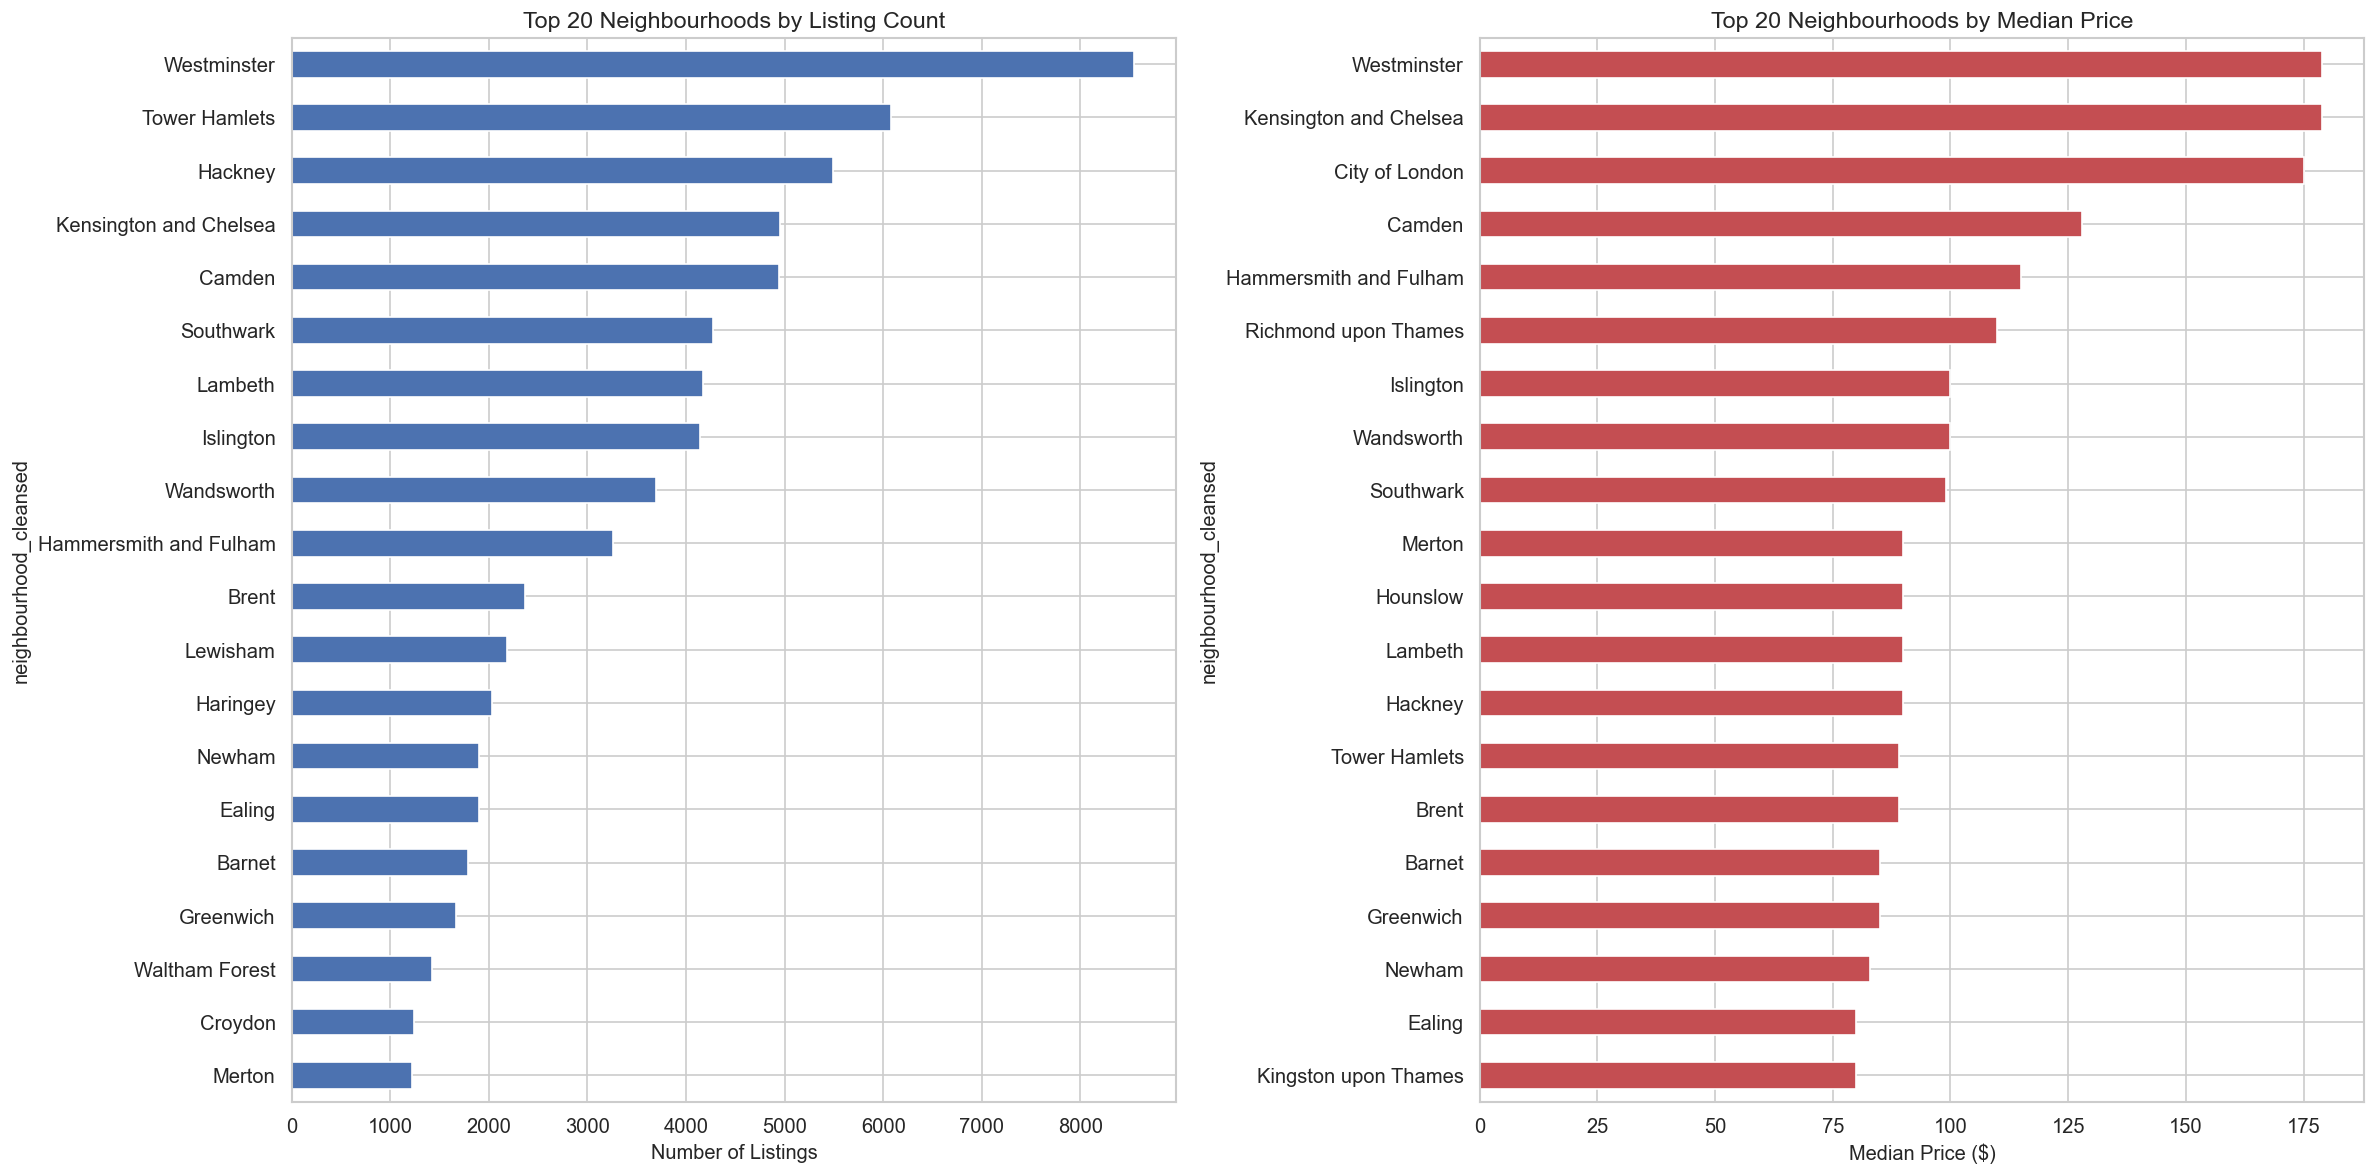

In [14]:
plot_neighbourhood_analysis(listings_viz)

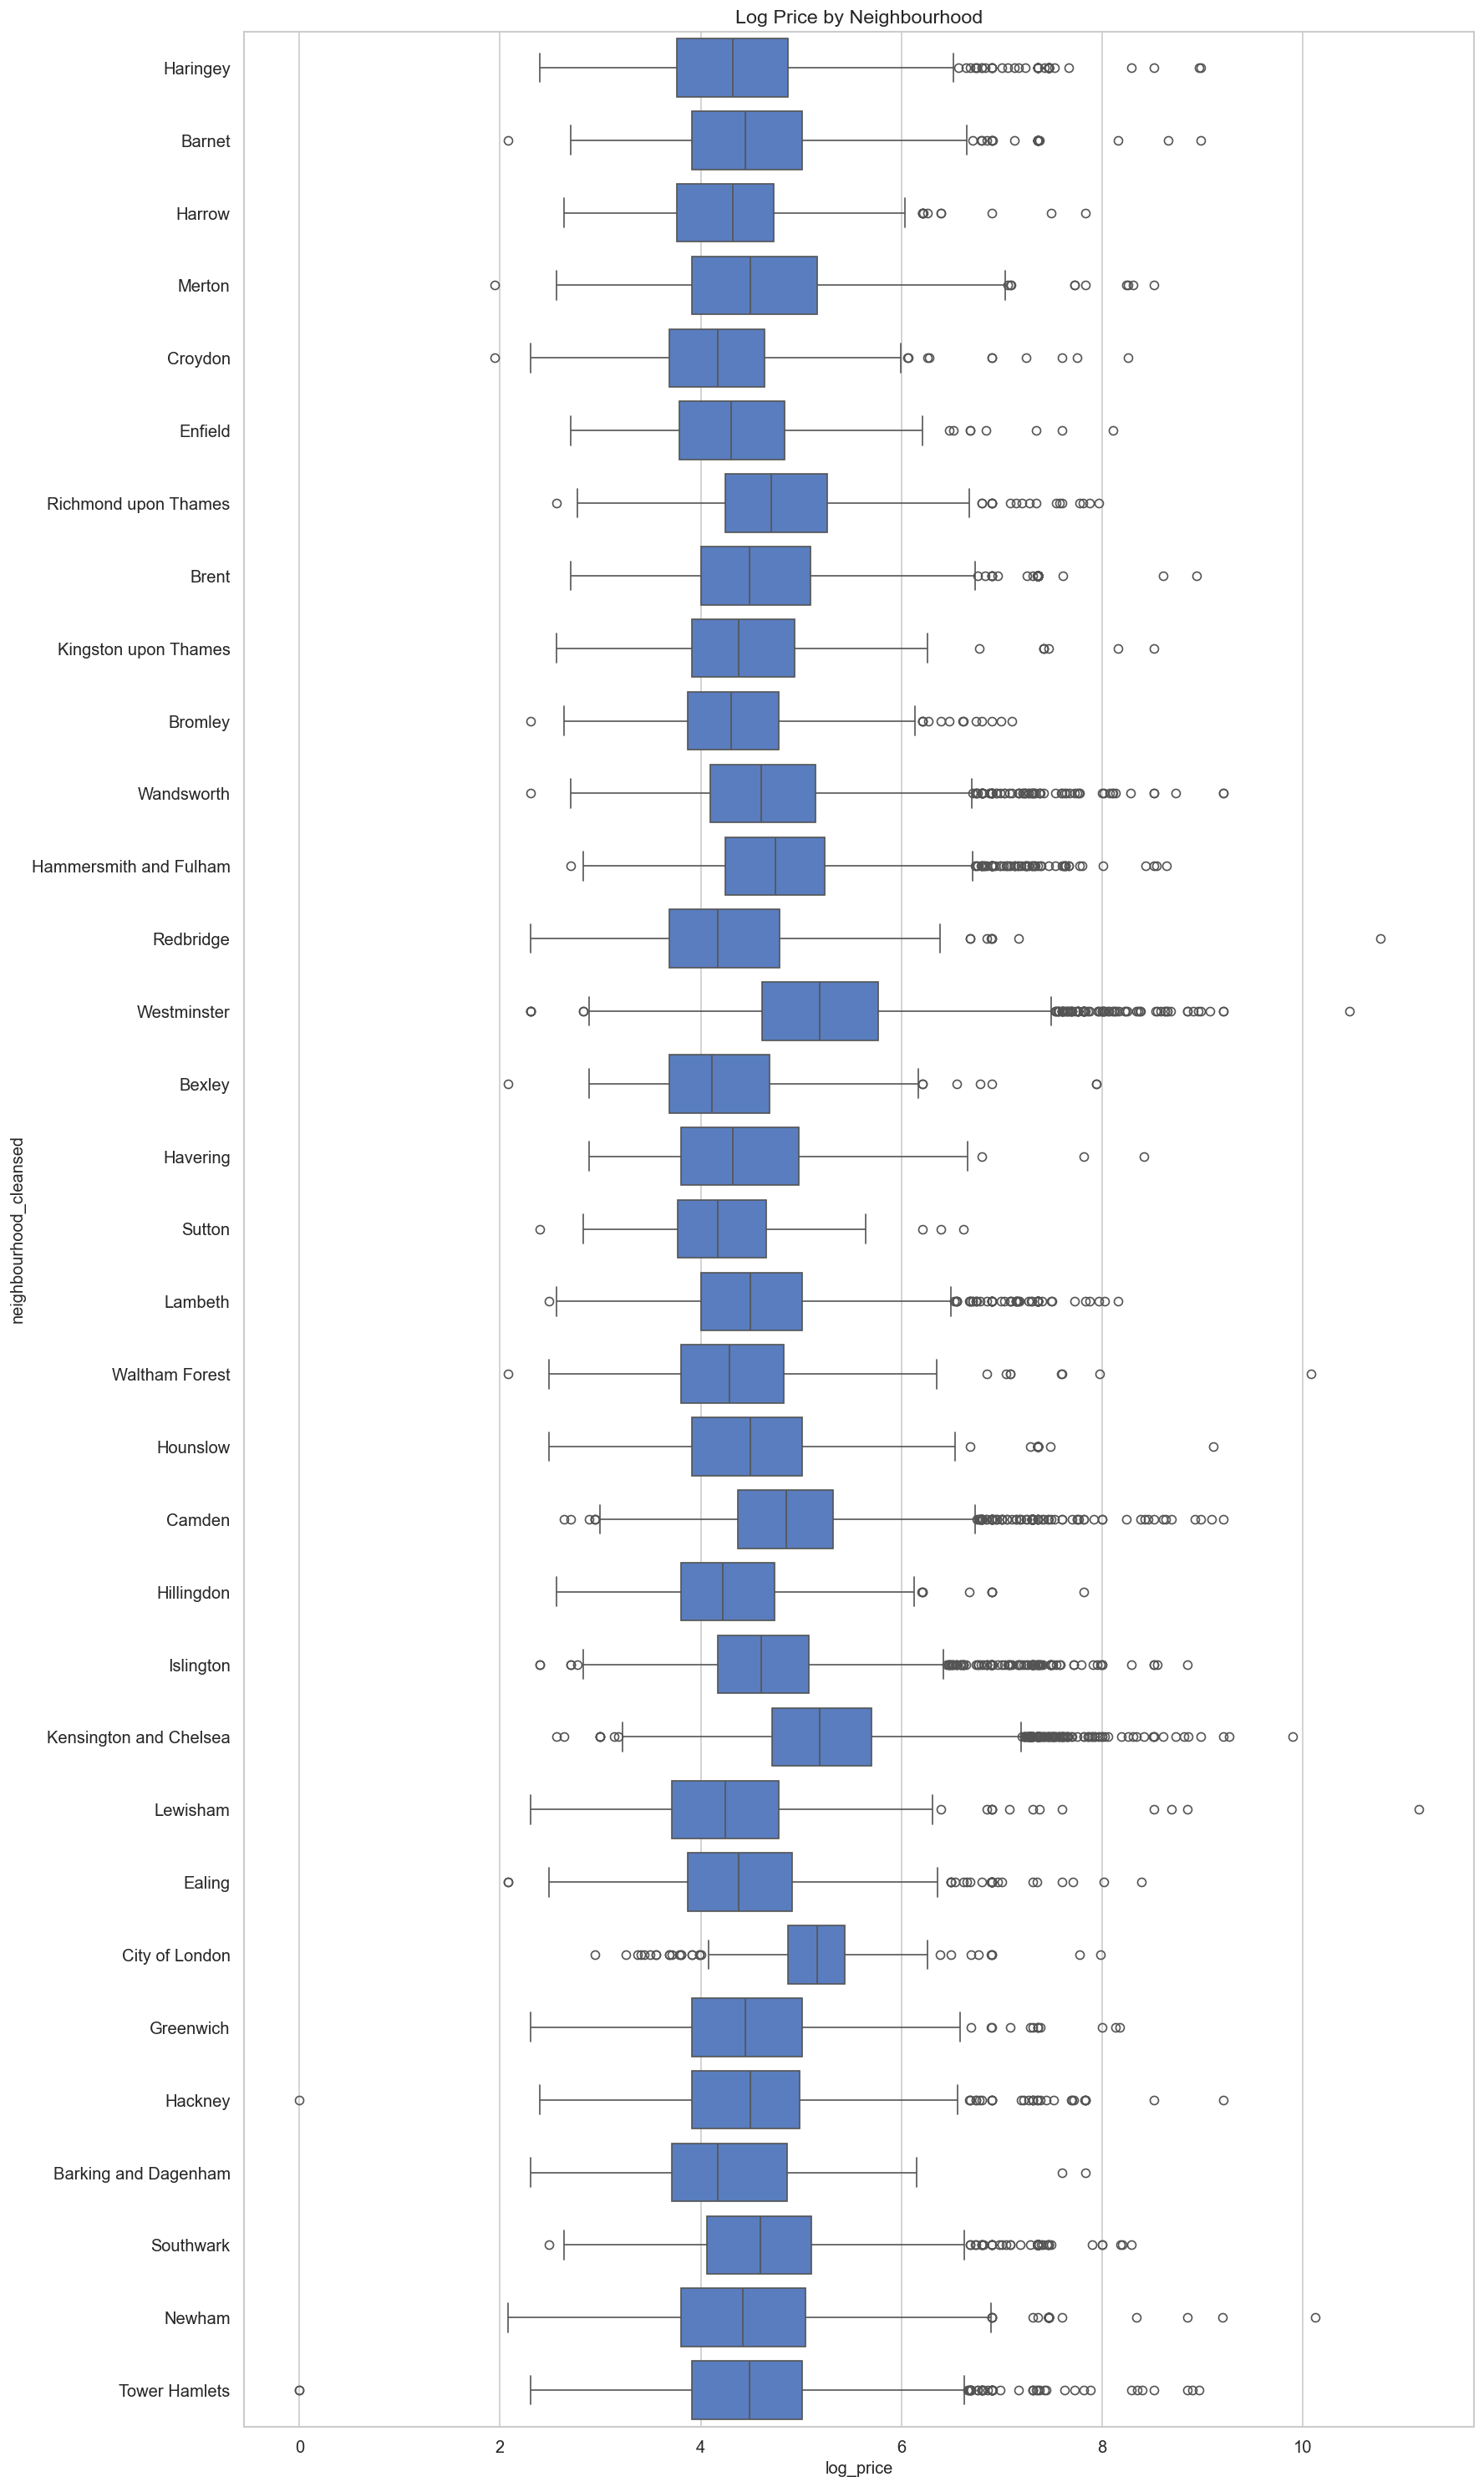

In [15]:
plot_boxplot_by_neighbourhood(listings_viz, log=True)

## 7. Correlation Matrix

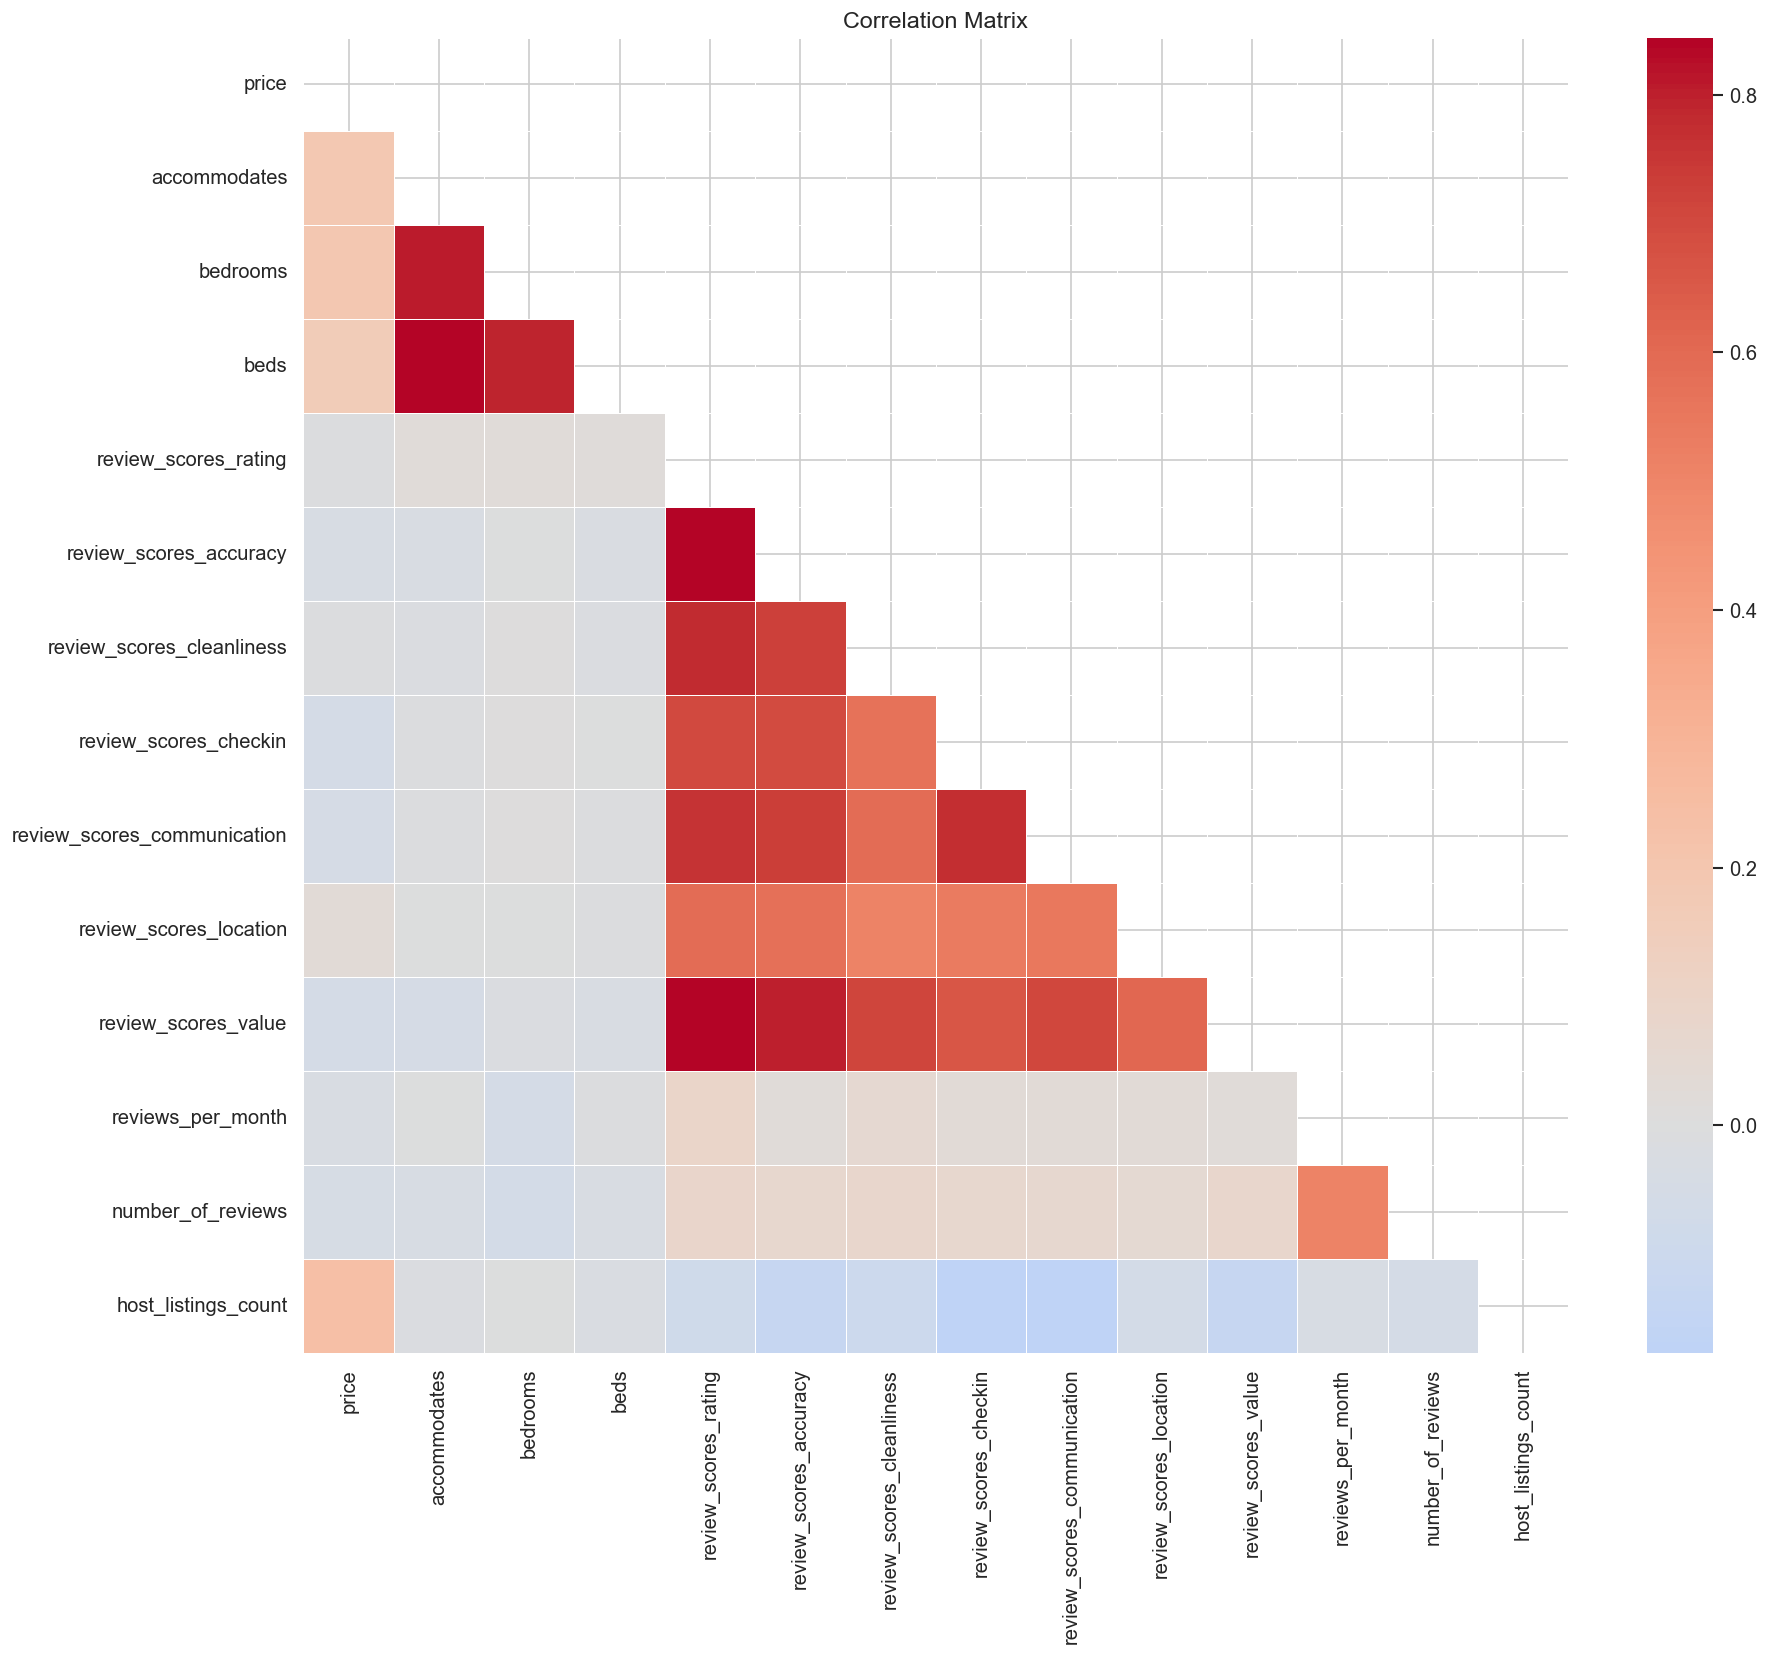

In [16]:
numeric_cols = [
    'price', 'accommodates', 'bedrooms', 'beds',
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month',
    'number_of_reviews', 'host_listings_count',
]
existing_cols = [c for c in numeric_cols if c in listings_viz.columns]
plot_correlation_matrix(listings_viz, columns=existing_cols)

## 8. Reviews Overview

In [17]:
reviews_raw.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [18]:
print(f'Total reviews: {len(reviews_raw):,}')
print(f'Unique listings with reviews: {reviews_raw["listing_id"].nunique():,}')
print(f'\nMissing values:')
print(reviews_raw.isnull().sum().sort_values(ascending=False))

Total reviews: 1,352,432
Unique listings with reviews: 56,548

Missing values:
comments         126
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
dtype: int64
